# 1) Fuentes de datos

Cargaremos la base de datos que está en un archivo tipo .csv que contiene todas las ventas de de la tienda durante un año

**Recordar hacer una copia de la Notebook en su Drive personal. NO trabajar en esta Notebook**

In [1]:
#1.1 Importar librerías necesarias
import pandas as pd
import numpy as np

In [2]:
#1.2 Subir el archivo de datos (está en el repositorio como base_muestra.csv)
data=pd.read_csv('/content/base_muestra.csv')

In [3]:
#1.3 Vistazo rápido a la estructura del data frame
data.head()

,CONSECUTIVO,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,31,540239,10002,INFLATABLE POLITICAL GLOBE,12,05/01/2011,$0.85,12682.0,France
1,39,541277,10002,INFLATABLE POLITICAL GLOBE,1,17/01/2011,$0.85,12673.0,Germany
2,42,541592,10002,INFLATABLE POLITICAL GLOBE,1,19/01/2011,$1.63,NaN,United Kingdom
3,43,541615,10002,INFLATABLE POLITICAL GLOBE,6,20/01/2011,$0.85,16395.0,United Kingdom
4,47,541878,10002,INFLATABLE POLITICAL GLOBE,1,24/01/2011,$1.63,NaN,United Kingdom


# 2) Calidad de los datos

Siempre al revisar cualquier base de datos es importante conocer la calidad de la misma. 

Es un problema común con el que se debe tener el máximo cuidado para evitar que análisis posteriores muestren resultados incorrectos. 

**Issues comunes**
*   Datos vacíos 
*   Registros duplicados
*   Capturas incorrectas  


In [4]:
#2.1 Revisaremos el tipo de variables de la base para saber si cada variable es congruente con su información
data.dtypes #--también puedes usar: data.info()

CONSECUTIVO      int64
InvoiceNo       object
StockCode        int64
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice       object
CustomerID     float64
Country         object
dtype: object

In [6]:
#2.2 Observamos que la variable 'InvoiceDate' no es de tipo fecha, de hecho 'UnitPrice' tampoco aparece con este formato numérico.

#Transformaremos la variable 'InvoiceDate' como fecha para poder manipularla correctamente en el análisis posterior
data["InvoiceDate"] = data["InvoiceDate"].astype('datetime64')
data.dtypes


CONSECUTIVO             int64
InvoiceNo              object
StockCode               int64
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice              object
CustomerID            float64
Country                object
dtype: object

In [7]:
#Ahora transofrmaremos la variable "UnitPrice ". Para convertir a número primero debemos quitarle los carácteres de moneda
# "$" y ",", reemplazando por nada y posteriormente convertiremos a número
data['UnitPrice ']=data['UnitPrice '].str.replace('$', '')
data['UnitPrice ']=data['UnitPrice '].str.replace(',', '')
data.head()


,CONSECUTIVO,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,31,540239,10002,INFLATABLE POLITICAL GLOBE,12,2011-05-01,0.85,12682.0,France
1,39,541277,10002,INFLATABLE POLITICAL GLOBE,1,2011-01-17,0.85,12673.0,Germany
2,42,541592,10002,INFLATABLE POLITICAL GLOBE,1,2011-01-19,1.63,NaN,United Kingdom
3,43,541615,10002,INFLATABLE POLITICAL GLOBE,6,2011-01-20,0.85,16395.0,United Kingdom
4,47,541878,10002,INFLATABLE POLITICAL GLOBE,1,2011-01-24,1.63,NaN,United Kingdom


In [8]:
data["UnitPrice "] = data["UnitPrice "].astype('float')


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12247 entries, 0 to 12246
Data columns (total 9 columns):
CONSECUTIVO    12247 non-null int64
InvoiceNo      12247 non-null object
StockCode      12247 non-null int64
Description    12205 non-null object
Quantity       12247 non-null int64
InvoiceDate    12247 non-null datetime64[ns]
UnitPrice      12187 non-null float64
CustomerID     8879 non-null float64
Country        12247 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 861.2+ KB


In [10]:
#2.5 Revisamos si hay valores nulos en la base
missing_values_count = data.isnull().sum()
missing_values_count

CONSECUTIVO       0
InvoiceNo         0
StockCode         0
Description      42
Quantity          0
InvoiceDate       0
UnitPrice        60
CustomerID     3368
Country           0
dtype: int64

In [11]:
#No queremos los registros vacíos de la variable 'UnitPrice '  ya que, supongamos, fueron registros de sistema y no de compras como tal
#Filtraremos una nueva base de datos 'data2' con esta variable limpia

data2 = data[data["UnitPrice "].notna()]
missing_values_count = data2.isnull().sum()
missing_values_count

CONSECUTIVO       0
InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     3308
Country           0
dtype: int64

# 3) Procedimientos comunes para el análisis de bases de datos

Manipular data frames siempre depende del objetivo del análisis.
Entre algunos procedimientos comunes al trabajar con bases de datos están:

*   Pegar información adicional
*   Realizar filtros sobre la información
*   Reagrupar la información en tablas pivote
*   Revisar distribuciones
*   Graficar variables de interés


In [12]:
#3.1 Pegar información adicional
#En la base de datos se encuentra la variable 'Country'
#Paso 1: Revisaremos primero cuantos diferentes paises existen dentro de esta variable
data2['Country'].unique()



array(['France', 'Germany', 'United Kingdom', 'Canada', 'EIRE', 'Spain',
       'Unspecified', 'Sweden', 'Iceland', 'Poland', 'Norway',
       'Switzerland', 'Portugal', 'Cyprus', 'Belgium', 'Israel', 'USA',
       'Australia', 'Netherlands', 'Austria', 'Finland', 'Hong Kong',
       'Channel Islands', 'Singapore', 'Italy', 'Japan', 'Greece',
       'Denmark', 'Saudi Arabia', 'Czech Republic', 'Brazil', 'Lebanon',
       'RSA'], dtype=object)

In [13]:
#Agregaremos una variable adicional que sea el continente del país. Para realizar vamos a subir el catálogo de países y continentes 
#y lo agregaremos a nuestra 'data2'
#Recuerda cargar el archivo primero y duepués leerlo en esta notebook

catalogo=pd.read_csv('/content/catalogo_continentes.csv')
catalogo.head()

,Country,continent
0,Australia,Australia
1,Austria,Europe
2,Bahrain,Asia
3,Belgium,Europe
4,Brazil,America


In [14]:
#Para unir cada pais con su contienente usaremos la siguiente instrucción
data2=data2.merge(catalogo, on='Country', how='left')
data2.head()

,CONSECUTIVO,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,continent
0,31,540239,10002,INFLATABLE POLITICAL GLOBE,12,2011-05-01,0.85,12682.0,France,Europe
1,39,541277,10002,INFLATABLE POLITICAL GLOBE,1,2011-01-17,0.85,12673.0,Germany,Europe
2,42,541592,10002,INFLATABLE POLITICAL GLOBE,1,2011-01-19,1.63,NaN,United Kingdom,Europe
3,43,541615,10002,INFLATABLE POLITICAL GLOBE,6,2011-01-20,0.85,16395.0,United Kingdom,Europe
4,47,541878,10002,INFLATABLE POLITICAL GLOBE,1,2011-01-24,1.63,NaN,United Kingdom,Europe


# 4) Análisis

*   4.1 ¿En qué continente hay mayores ventas (en número de productos y en monto de ventas)
*   4.2 Hacer una gráfica del número de ventas por país solo del contienente con mayores ventas
*   4.3 TOP 10 productos vendidos en el país con mayores ventas
*   4.4 Serie de tiempo en ventas

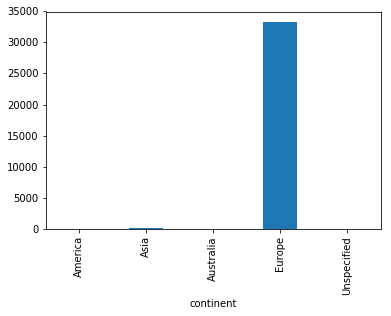

In [15]:
#4.1 ¿En qué continente hay mayores ventas (en número de productos y en monto de ventas)
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#comentar la linea de cosigo que no se quiera graficar
data2.groupby('continent').sum()["UnitPrice "].plot(kind='bar') #Para graficar monto
#data2.groupby('continent').sum()["Quantity"].plot(kind='bar') #Para graficar cantidad

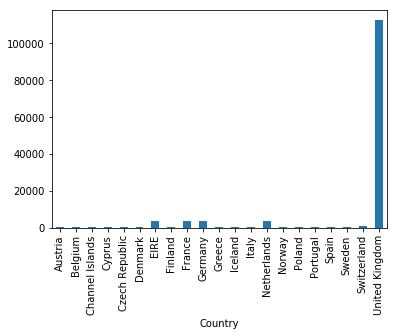

In [16]:
#4.2 Hacer una gráfica del número de ventas por país solo del contienente con mayores ventas

europe=data2[data2['continent']=='Europe']
europe.groupby('Country').sum()["Quantity"].plot(kind='bar')


In [17]:
#4.3 TOP 10  productos vendidos en el país con mayores ventas
UK=europe[europe['Country']=='United Kingdom']
UK2=pd.DataFrame(UK.groupby('Description').sum()["Quantity"])
UK2.sort_values("Quantity").head(10)


,Quantity
Description,
*USB Office Mirror Ball,1
CHERRY BLOSSOM PURSE,1
CHRISTMAS TREE T-LIGHT HOLDER,1
EIGHT PIECE CREEPY CRAWLIE SET,1
FOLDING UMBRELLA WHITE/RED POLKADOT,1
ASSORTED LAQUERED INCENSE HOLDERS,1
GOLD FABRIC MIRROR,1
HANGING MEDINA LANTERN SMALL,1
LITTLE GREEN MONSTER SOFT TOY,1


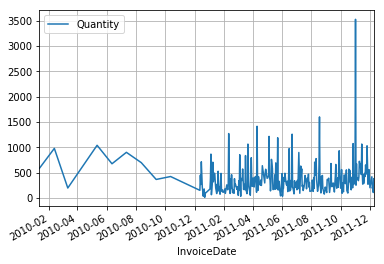

In [18]:
#4.4 Serie de tiempo en ventas
UK3=pd.DataFrame(UK.groupby('InvoiceDate').sum()["Quantity"])

UK3.plot(grid=True)#, figsize=(15,5))